In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv(r"C:\Users\Right Click\Desktop\ObesityDataSet_raw_and_data_sinthetic.csv")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [7]:
dataset.shape

(2111, 17)

In [8]:
dataset.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
dataset.sample(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
1512,19.850524,Male,1.785062,104.187314,no,yes,2.000000,3.000000,no,no,2.151570,yes,1.605983,0.000000,Sometimes,Public_Transportation,Obesity_Type_I
1953,24.291205,Female,1.711460,113.372851,Sometimes,yes,3.000000,3.000000,no,no,2.796894,yes,0.382189,0.167790,Sometimes,Public_Transportation,Obesity_Type_III
1662,23.083621,Male,1.848553,121.421121,Sometimes,yes,3.000000,2.567567,no,no,2.011023,yes,0.916478,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
434,19.000000,Male,1.890000,87.000000,Frequently,yes,2.000000,4.000000,no,no,2.000000,no,3.000000,1.000000,Frequently,Automobile,Normal_Weight
735,18.000000,Male,1.739344,50.951444,Sometimes,yes,1.889883,3.000000,no,no,1.959531,yes,0.520407,1.151166,Sometimes,Public_Transportation,Insufficient_Weight


In [10]:
dataset.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [11]:
#Finding Numerical Columns
num_col=[]
for col in dataset.columns:
    if(dataset[col].dtypes!='object'):
        num_col.append(col)
print(f"There are total {len(num_col)} numerical columns in dataset")
print(num_col)

There are total 8 numerical columns in dataset
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [12]:
#Finding Categorical Columns
cat_col=[]
for col in dataset.columns:
    if(dataset[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in dataset")
print(cat_col)

There are total 9 categorical columns in dataset
['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


In [13]:
#Creation of copy of dataset
data=dataset.copy(deep=True)

In [14]:
#Finding null values
data.isnull().mean()*100

Age                               0.0
Gender                            0.0
Height                            0.0
Weight                            0.0
CALC                              0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
SCC                               0.0
SMOKE                             0.0
CH2O                              0.0
family_history_with_overweight    0.0
FAF                               0.0
TUE                               0.0
CAEC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

In [15]:
import warnings
warnings.simplefilter('ignore')

In [16]:
print(num_col)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [17]:
data[num_col].head(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [18]:
data[num_col].sample(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
1862,25.783865,1.655646,110.217340,3.000000,3.000000,1.528258,0.015860,0.436068
675,18.988581,1.544263,41.535047,2.686010,1.000000,1.310074,0.000000,1.064700
177,22.000000,1.840000,84.000000,3.000000,3.000000,2.000000,3.000000,0.000000
819,23.170309,1.707557,75.306702,2.303367,3.042774,1.277636,0.944982,0.366126
1521,26.225442,1.773664,116.160329,2.442536,3.000000,2.174371,0.000000,1.928972


In [19]:
data[num_col].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


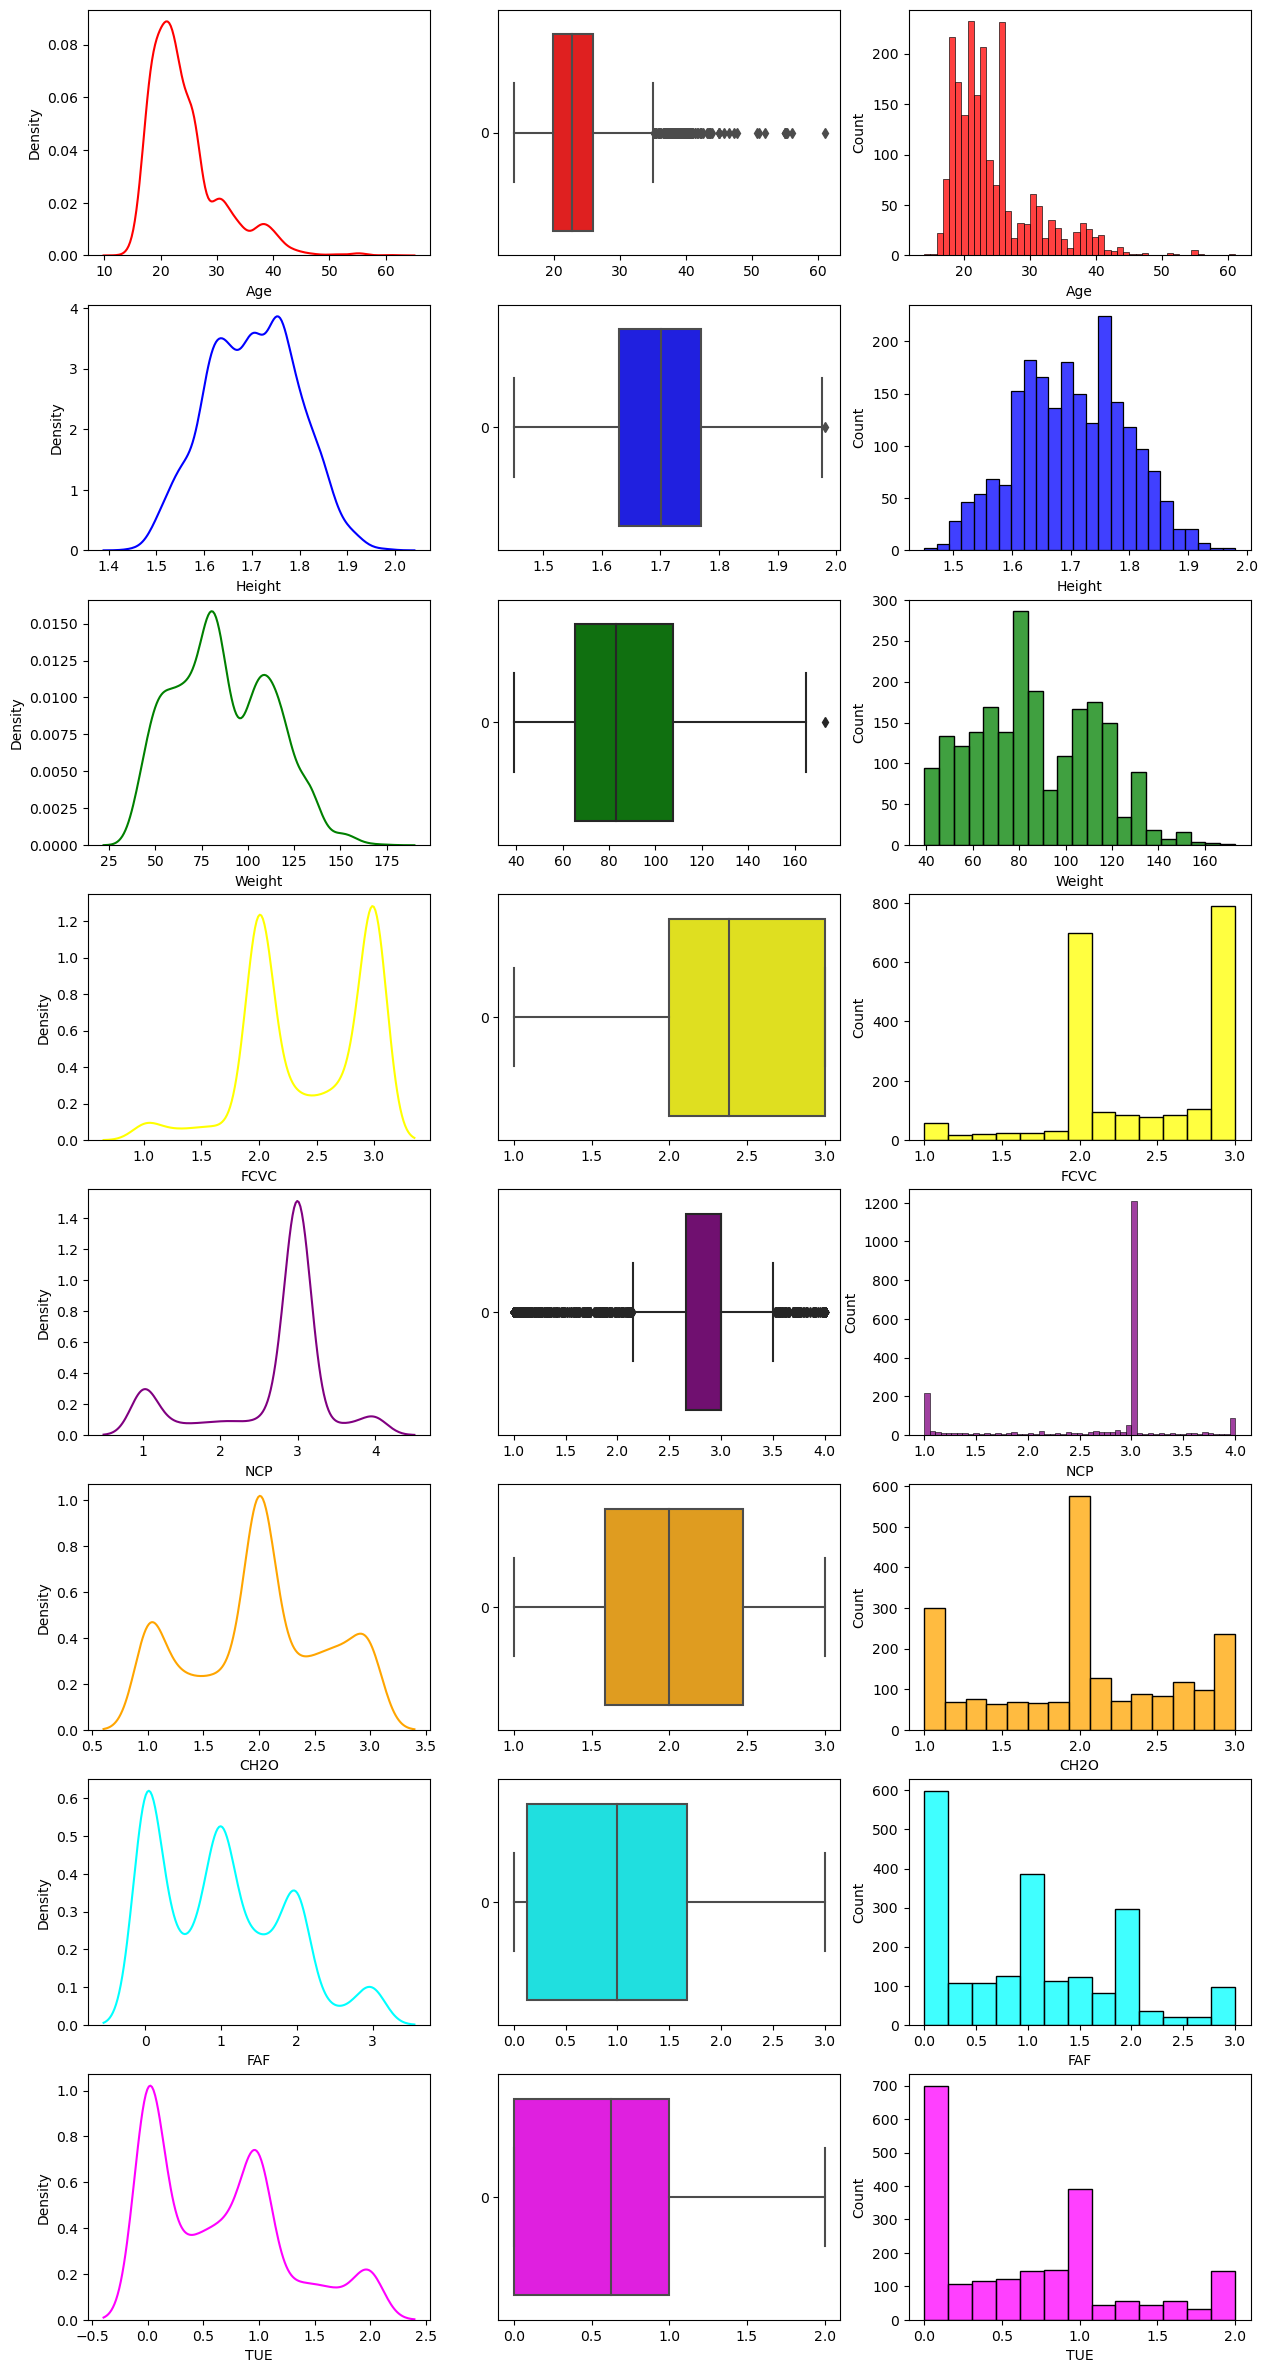

In [20]:
figure,axes=plt.subplots(8,3,figsize=(15,30))
i=0
color=["#FF0000", "#0000FF", "#008000", "#FFFF00", "#800080", "#FFA500", "#00FFFF", "#FF00FF"]
for col in num_col:
    sns.distplot(data[col],hist=False,ax=axes[i][0],color=color[i])
    sns.boxplot(data[col],orient='h',ax=axes[i][1],color=color[i])
    sns.histplot(data[col],ax=axes[i][2],color=color[i])
    i=i+1

In [21]:
print(cat_col)

['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


In [22]:
data[cat_col].sample(5)

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
2064,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
1121,Female,no,yes,no,no,yes,Sometimes,Automobile,Overweight_Level_II
1226,Female,no,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
177,Male,Sometimes,yes,yes,no,yes,Frequently,Public_Transportation,Normal_Weight
1894,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III


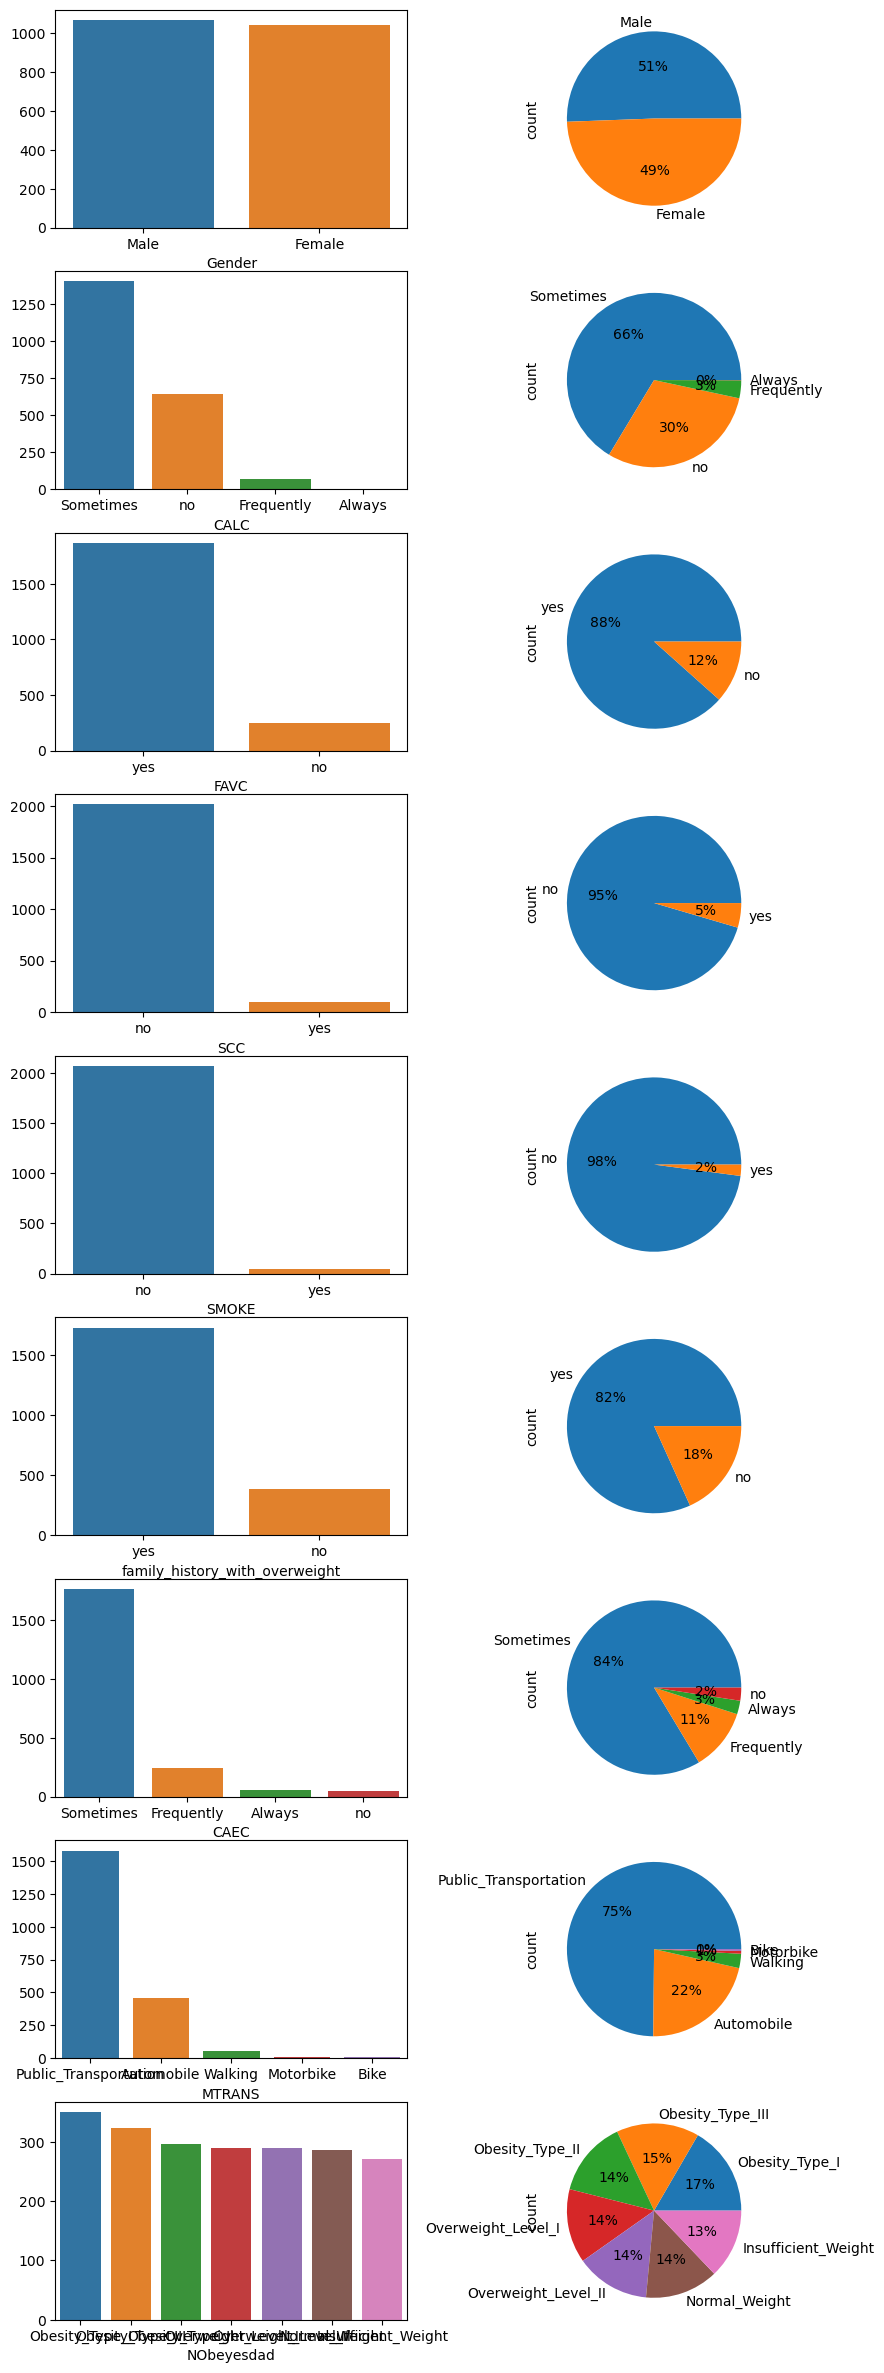

In [23]:
figure,axes=plt.subplots(9,2,figsize=(10,30))
i=0
for col in cat_col:
    index=data[col].value_counts().index
    value=data[col].value_counts().values
    sns.barplot(x=index,y=value,ax=axes[i][0])
    data[col].value_counts().plot(kind='pie',autopct="%0.00f%%",ax=axes[i][1])
    i=i+1

In [24]:
data.sample(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
816,23.451595,Male,1.670227,75.000000,Sometimes,yes,2.000000,3.0,no,no,2.000000,yes,0.129163,1.983678,Sometimes,Public_Transportation,Overweight_Level_I
879,19.726522,Female,1.508267,61.104030,Sometimes,yes,2.778079,3.0,yes,no,1.696691,no,0.942240,0.879925,Sometimes,Public_Transportation,Overweight_Level_I
362,37.000000,Female,1.650000,73.000000,Sometimes,no,3.000000,3.0,no,no,2.000000,yes,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_I
1805,25.902283,Female,1.678658,104.954834,Sometimes,yes,3.000000,3.0,no,no,1.666160,yes,0.210351,0.734210,Sometimes,Public_Transportation,Obesity_Type_III
488,21.000000,Male,1.880000,84.000000,Sometimes,yes,3.000000,3.0,no,no,3.000000,yes,2.000000,1.000000,Sometimes,Walking,Normal_Weight
